In [22]:
# Kevin Fan
# Group: Amia Yi
# CMSC320 0201

In [23]:
# imports
import numpy as np
import pandas as pd
from selenium import webdriver
from bs4 import BeautifulSoup

In [24]:
# step 1
# scrape spaceweather data with selenium and parse with beautiful soup
#construct dataframe  with scraped html in pandas

In [25]:
#driver
driver = webdriver.Firefox()
driver.get("https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html")
#grab
html = driver.page_source

In [26]:
# build dataframe
swl_frame = pd.read_html(html)[0]
# set display as requested
pd.set_option('display.max_rows', 10)
swl_frame = swl_frame.set_axis(["rank", "x_class", "date", "region", "start_time", "max_time", "end_time", "movie"], axis=1)
swl_frame

C:\Users\aegir\AppData\Local\Temp\ipykernel_37756\1007838439.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  swl_frame = pd.read_html(html)[0]


,rank,x_class,date,region,start_time,max_time,end_time,movie
0,1,X40+,2003/11/04,486,19:29,19:53,20:06,View archive
1,2,X28.57+,2001/04/02,9393,21:32,21:51,22:03,View archive
2,3,X24.57+,2003/10/28,486,09:51,11:10,11:24,View archive
3,4,X24.42+,2005/09/07,808,17:17,17:40,18:03,View archive
4,5,X20.67+,2001/04/15,9415,13:19,13:50,13:55,View archive
...,...,...,...,...,...,...,...,...
45,46,X4.02,2001/12/11,9733,07:58,08:08,08:14,View archive
46,47,X3.93,2015/05/05,2339,22:05,22:11,22:15,View archive
47,48,X3.88,2003/11/03,488,01:09,01:30,01:45,View archive
48,49,X3.81,1998/05/06,8210,07:58,08:09,08:20,View archive


In [27]:
# part 2
# clean part 1 dataframe
# remove last col, combine date and time into datetimes, drop unnecessary columns

In [28]:
# remove last column
swl_frame.drop(["movie"], axis=1, inplace=True)

In [29]:
# iterate through every row of dataframe to convert to datetime
i = 0
for index, row in swl_frame.iterrows():
    swl_frame.at[i, "start_time"] = pd.to_datetime(row["date"] + " " + row["start_time"])
    swl_frame.at[i, "max_time"] = pd.to_datetime(row["date"] + " " + row["max_time"])
    swl_frame.at[i, "end_time"] = pd.to_datetime(row["date"] + " " + row["end_time"])
    i += 1

In [30]:
# remove unnecessary date column
swl_frame.drop(["date"], axis=1, inplace=True)

In [31]:
# rename columns to datetime
swl_frame = swl_frame.rename(columns={"start_time": "start_datetime", "max_time": "max_datetime", "end_time": "end_datetime"})
swl_frame

,rank,x_class,region,start_datetime,max_datetime,end_datetime
0,1,X40+,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X28.57+,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X24.57+,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X24.42+,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X20.67+,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
...,...,...,...,...,...,...
45,46,X4.02,9733,2001-12-11 07:58:00,2001-12-11 08:08:00,2001-12-11 08:14:00
46,47,X3.93,2339,2015-05-05 22:05:00,2015-05-05 22:11:00,2015-05-05 22:15:00
47,48,X3.88,488,2003-11-03 01:09:00,2003-11-03 01:30:00,2003-11-03 01:45:00
48,49,X3.81,8210,1998-05-06 07:58:00,1998-05-06 08:09:00,1998-05-06 08:20:00


In [32]:
#Step 3: Scrape the NASA data (15 pts)

#Next you need to scrape the data in http://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html to get additional data about these solar flares. 
# This table format is described here: http://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2_description.html

# parse nasa flare data and fill into a correctly formatted table with all time values valid

#grab necessary driver, html, soup basics
driver.get("https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html")
html = driver.page_source
soup = (BeautifulSoup(html, 'html.parser'))


In [33]:
#scrape table and split into row lines
table = ((soup.select_one('pre').text)).splitlines()[10:-1] 
#for every line, split by whitespace, remove whitespaces from each element, add as row to dataframe
data = []
for line in table:
    row = line.split()
    data.append(row[0:15])


In [34]:
#create dataframe
df = pd.DataFrame(data, columns=['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency', 'end_frequency', 'flare_location', 'flare_region', 'flare_classification', 'cme_date', 'cme_time', 'cme_angle', 'cme_width', 'cme_speed', 'plot'])
df


,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,plot
0,1996/05/15,05:45,05/15,06:34,10000,500,------,-----,----,--/--,--:--,----,----,----,PHTX
1,1997/01/20,08:56,01/20,09:02,14000,12000,------,-----,----,01/20,09:31,281,72,175,PHTX
2,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX
3,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX
4,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,2023/05/05,08:04,05/05,08:50,14000,1300,N14E32,13296,M2.1,05/05,08:00,Halo,360,770,PHTX
601,2023/05/07,22:57,05/08,00:10,14000,600,N16W06,13296,M1.6,05/07,23:12,Halo,360,1075,PHTX
602,2023/05/09,18:51,05/09,20:20,16000,1250,N13W31,13296,M4.2,05/09,19:00,Halo,360,1209,PHTX
603,2023/06/17,10:37,06/17,10:42,14000,5500,S22E85,EP,----,06/17,10:48,113,154,570,PHTX


In [35]:
#change all 24:00 times to 00:00, shift the day to the next one
df.loc[df['start_time'] == '24:00', 'start_date'] = df.loc[df['start_time'] == '24:00', 'start_date'].map(lambda x: x[:-2] + str(eval(x[-1:]) + 1) if x[-2:] == "09" else x[:-2] + str(eval(x[-2:]) + 1) if str(x[-1:])== "9" else x[:-1] + str(eval(x[-1:]) + 1))
df.loc[df['cme_time'] == '24:00', 'cme_date'] = df.loc[df['cme_time'] == '24:00', 'cme_date'].map(lambda x: x[:-2] + str(eval(x[-1:]) + 1) if x[-2:] == "09" else x[:-2] + str(eval(x[-2:]) + 1) if str(x[-1:])== "9" else x[:-1] + str(eval(x[-1:]) + 1))
df.loc[df['end_time'] == '24:00', 'end_date'] = df.loc[df['end_time'] == '24:00', 'end_date'].map(lambda x: x[:-2] + str(eval(x[-1:]) + 1) if x[-2:] == "09" else x[:-2] + str(eval(x[-2:]) + 1) if str(x[-1:])== "9" else x[:-1] + str(eval(x[-1:]) + 1))

df = df.map(lambda x: np.nan if (x==None or str(x)[0]=='-') else "00:00" if x=="24:00" else x)


In [36]:
#Step 4: Cleaning
#create new is_halo column to determine which flares are halos, and set cme angle to NaN for those that are
#denote which flare widths are lower bounds in a column


#Replace All halo items in angles with nan and create new is_halo column to denote such events
df["is_halo"] = df["cme_angle"] == "Halo"
df.loc[df["cme_angle"] == "Halo", "cme_angle"] = np.nan


In [37]:
#merge all time and date cells to become datetime cells
#df["start_date"] = df["start_date"] + " " + df["start_time"]

df["cme_date"] = df['start_date'].apply(lambda x: x[0:4]) + "/" + df["cme_date"]
df["end_date"] = df['start_date'].apply(lambda x: x[0:4]) + "/" + df["end_date"]

df['start_date'] = pd.to_datetime(df['start_date'] + " " + df['start_time'], format='%Y/%m/%d %H:%M')
df['cme_date'] = pd.to_datetime(df['cme_date'] + " " + df['cme_time'], format='%Y/%m/%d %H:%M')
df['end_date'] = pd.to_datetime(df['end_date'] + " " + df['end_time'], format='%Y/%m/%d %H:%M')
#df["end_date"] = df["end_date"] + " " + df["end_time"]
#df["cme_date"] = df["cme_date"] + " " + df["cme_time"]
df.rename(columns={"start_date":"start_datetime", "end_date":"end_datetime", "cme_date":"cme_datetime"}, inplace=True)
#df['start_date_time'] = pd.to_datetime(df['start_datetime'], format='mixed')
#remove unnecessary cells
df.drop(["start_time", "end_time", "cme_time"], axis=1, inplace=True)


In [38]:
#create lower bound column to denote if a provided width is a lower bound
df["width_lower_bound"] = df["cme_width"].apply(lambda  x: True if str(x)[0] == '>' else False)
df

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,plot,is_halo,width_lower_bound
0,1996-05-15 05:45:00,1996-05-15 06:34:00,10000,500,NaN,NaN,NaN,NaT,NaN,NaN,NaN,PHTX,False,False
1,1997-01-20 08:56:00,1997-01-20 09:02:00,14000,12000,NaN,NaN,NaN,1997-01-20 09:31:00,281,72,175,PHTX,False,False
2,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX,False,False
3,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,PHTX,True,False
4,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,PHTX,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,2023-05-05 08:04:00,2023-05-05 08:50:00,14000,1300,N14E32,13296,M2.1,2023-05-05 08:00:00,NaN,360,770,PHTX,True,False
601,2023-05-07 22:57:00,2023-05-08 00:10:00,14000,600,N16W06,13296,M1.6,2023-05-07 23:12:00,NaN,360,1075,PHTX,True,False
602,2023-05-09 18:51:00,2023-05-09 20:20:00,16000,1250,N13W31,13296,M4.2,2023-05-09 19:00:00,NaN,360,1209,PHTX,True,False
603,2023-06-17 10:37:00,2023-06-17 10:42:00,14000,5500,S22E85,EP,NaN,2023-06-17 10:48:00,113,154,570,PHTX,False,False


In [39]:
#Part 2

In [40]:
# question 1:
# One can reason that both sites reference the same flares if going off of date alone. However,
# flare classifications and other factors do not always correspond in the way the dates often do. 
# Thus, data is not homogenous between the two sets despite seemingly matching similar flares.

# make new dataframe with only the flares classified with an X, then sort by number
nasa_t50 = df.dropna(subset=["flare_classification"], how="all")
nasa_t50 = nasa_t50.loc[nasa_t50["flare_classification"].str.startswith("X")]
nasa_t50 = nasa_t50.sort_values(by="flare_classification", ascending=False, key=lambda col: col.str[1:].astype(float)).reset_index(drop=True).rename(index=lambda x: x + 1)
nasa_t50 = nasa_t50.truncate(axis="index", before=0, after=50)

# set display to see
pd.set_option('display.max_rows', 50)
nasa_t50

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,plot,is_halo,width_lower_bound
1,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NaN,360,2657,PHTX,True,False
2,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,PHTX,False,False
3,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NaN,360,2459,PHTX,True,False
4,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,PHTX,False,False
5,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NaN,360,2029,PHTX,True,False
6,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,PHTX,True,False
7,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360,1571,PHTX,True,False
8,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaT,NaN,NaN,NaN,PHTX,False,False
9,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360,2598,PHTX,True,False
10,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,12673,X8.2,2017-09-10 16:00:00,NaN,360,3163,PHTX,True,False


In [41]:
#Question 2: Integration (15 pts)

#Write a function that finds the best matching row in the NASA data for each of the top 50 solar flares in the
# SpaceWeatherLive data. Here, you have to decide for yourself how you determine what is the best matching entry in the NASA data 
# for each of the top 50 solar flares.
#In your submission, include an explanation of how you are defining best matching rows across the two datasets 
# in addition to the code used to find the best matches. 
# Finally, use your function to add a new column to the NASA dataset indicating its rank according to 
# SpaceWeatherLive, if it appears in that dataset.

# The function compares a row from the spaceweather set and a row from the nasa set and returns a score 
# that indicates how similar they are based on their start and end datetimes as well as the region
# this function is then used for every row of each set to determine which row of the nasa set matches best to the space weather set
# this information is used to compile the new column for the nasa table denoting which spaceweather row it was matched to
# this method of measuring flare similarity can result in nasa flares appearing multiple times for different spaceweather flares

#compare rows as a series
def comp_rows (SF_row, NS_row):
        #compare by scoring the differences in the following categories:
        #start datetime
        #end datetime
        #region
        #a high score indicates a bad match, a low score indicates a better match
        score = 0
        
        #start datetime
        sf_start_dt = SF_row['start_datetime']
        ns_start_dt = NS_row['start_datetime']
        score = score + abs((sf_start_dt - ns_start_dt).days)
        
        #end datetime
        sf_end_dt = SF_row['end_datetime']
        ns_end_dt = NS_row['end_datetime']
        score = score + abs((sf_end_dt - ns_end_dt).days)

        
        #region
        sf_region = SF_row['region']
        ns_region = NS_row['flare_region']
        score = score + (abs((sf_region) - eval(ns_region)))
        
        return score

matches = []
for index1, row1 in swl_frame.iterrows():
        best_match = 1
        lowest = comp_rows(row1, nasa_t50.iloc[0])
        for index2, row2 in nasa_t50.iterrows():
                new_low = comp_rows(row1, row2)
                if (lowest > new_low):
                        lowest = new_low
                        best_match = index2
        matches.append(best_match)
lst = [np.nan] * 50
for i in range (0, 50):
        lst[matches[49-i] - 1] = (50 - i) 
nasa_t50['sw_rank'] = lst
nasa_t50

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,plot,is_halo,width_lower_bound,sw_rank
1,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NaN,360,2657,PHTX,True,False,1.0
2,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,PHTX,False,False,2.0
3,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NaN,360,2459,PHTX,True,False,3.0
4,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,PHTX,False,False,5.0
5,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NaN,360,2029,PHTX,True,False,NaN
6,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,PHTX,True,False,8.0
7,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360,1571,PHTX,True,False,7.0
8,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaT,NaN,NaN,NaN,PHTX,False,False,9.0
9,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360,2598,PHTX,True,False,10.0
10,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,12673,X8.2,2017-09-10 16:00:00,NaN,360,3163,PHTX,True,False,11.0


[41, 325]
[50, 605]


<Axes: >

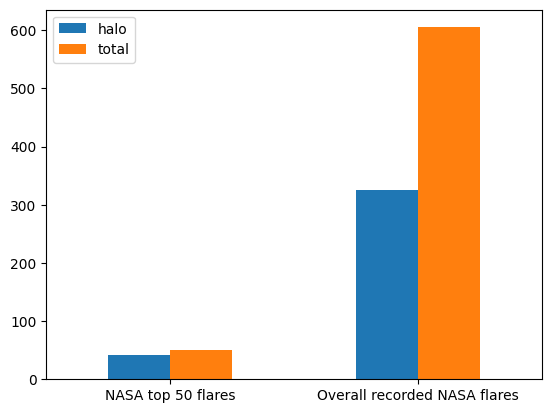

In [42]:
# question 3:

# the plot shows differing patterns in occurrences of halo cme flares between the largest ones and the whole set of flares.
# thus, we can gather information on whether the size of flares indicates the occurrence of a halo or not
# the plot uses the top 50 nasa flares and the total nasa set to compare if halos are more likely to occur in one or theother 
# the plot indicates that large flares do indeed correlate with a higher rate of halo flare occurrence
# 80% of the top 50 nasa flares were halos, as compared to a little over 50% for the entire nasa data

index = ["NASA top 50 flares", "Overall recorded NASA flares"]
num_halo = [(nasa_t50.is_halo == True).sum(), (df.is_halo == True).sum()]
num_total = [len(nasa_t50.index), len(df.index)]
print(num_halo)
print(num_total)
pd.DataFrame({"halo": num_halo, "total": num_total,}, index=index).plot.bar(rot=0)